In [1]:
from shared import *
from utils.wearable_types import get_wearables_circulating_supply_df
from utils.wearable_market_cap import get_wearables_market_cap_df
import utils.forge as forge
purchases_df = get_wearable_purchases_df()
wearable_types_df = get_wearable_types_df()
forge_items_df = forge.get_forge_items_df()
circulating_supply_df = get_wearables_circulating_supply_df(wearable_types_df, forge_items_df)
purchases_types_df = get_wearables_purchases_types_df(wearable_types_df, purchases_df)
market_cap_df = get_wearables_market_cap_df(circulating_supply_df, purchases_df)

## Wearables Market Cap
Estimates the total value of the wearables market (not including unforged wearable components). As with most market cap estimates, this is more of an academic number than one to be taken literally. The methodology is as traditionally used: ``` Last Sale Price x Circulating Supply = Market Cap ```

In [2]:
column_name_mappings = {'name': 'Wearable', 'price': 'Median Price (GHST)', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'datePurchased': 'Date', 'startOfWeekPurchased': 'Week', 'yearMonthPurchased': 'Month', 'lastPrice': 'Last Sale Price (GHST)', 'marketCap': 'Market Cap (GHST)', 'maxQuantity': 'Total Supply', 'circulating_supply': 'Circulating Supply'}

def get_market_cap_by_column(column_name):
    return market_cap_df.pivot_table(index=column_name,values=['marketCap'],aggfunc=np.sum,margins=False).reset_index().rename(columns=column_name_mappings)
total_market_cap_df = pd.DataFrame([market_cap_df['marketCap'].sum()], columns=["Market Cap (GHST)"])
cap_by_name_df = market_cap_df.pivot_table(index='name',values=['lastPrice', 'circulating_supply', 'marketCap'],aggfunc=np.sum,margins=False).reset_index().rename(columns=column_name_mappings)
cap_by_slot_df = get_market_cap_by_column('slotNames')
cap_by_rarity_df = get_market_cap_by_column('rarity')

show_itable(total_market_cap_df)

Market Cap (GHST)
Loading... (need help?)


### Market Cap by Wearable

In [4]:
# need to reorder columns due to pandas pivot values column sorting issue: https://github.com/pandas-dev/pandas/issues/17041
show_itable_long(cap_by_name_df[[column_name_mappings['name'],column_name_mappings['lastPrice'],column_name_mappings['circulating_supply'],column_name_mappings['marketCap']]], order=[[3, 'desc']])

### Market Cap by Slot

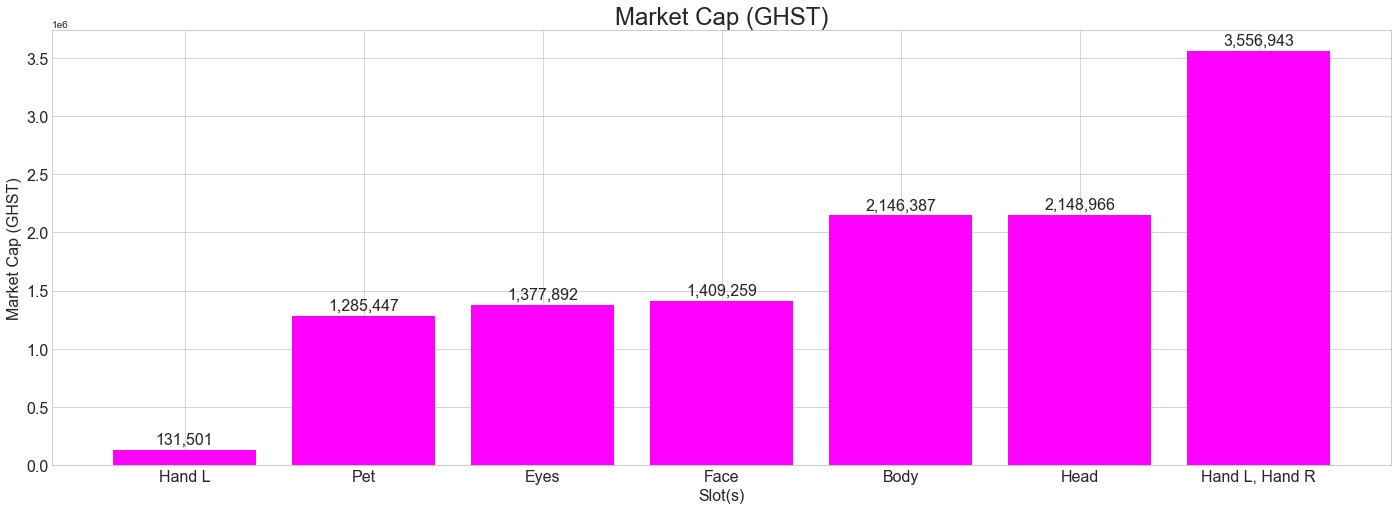

In [5]:
fig, ax = get_bar_charts(cap_by_slot_df.sort_values(column_name_mappings['marketCap']), column_name_mappings['slotNames'], [column_name_mappings['marketCap']], [GHST_COLOR])

### Market Cap by Rarity

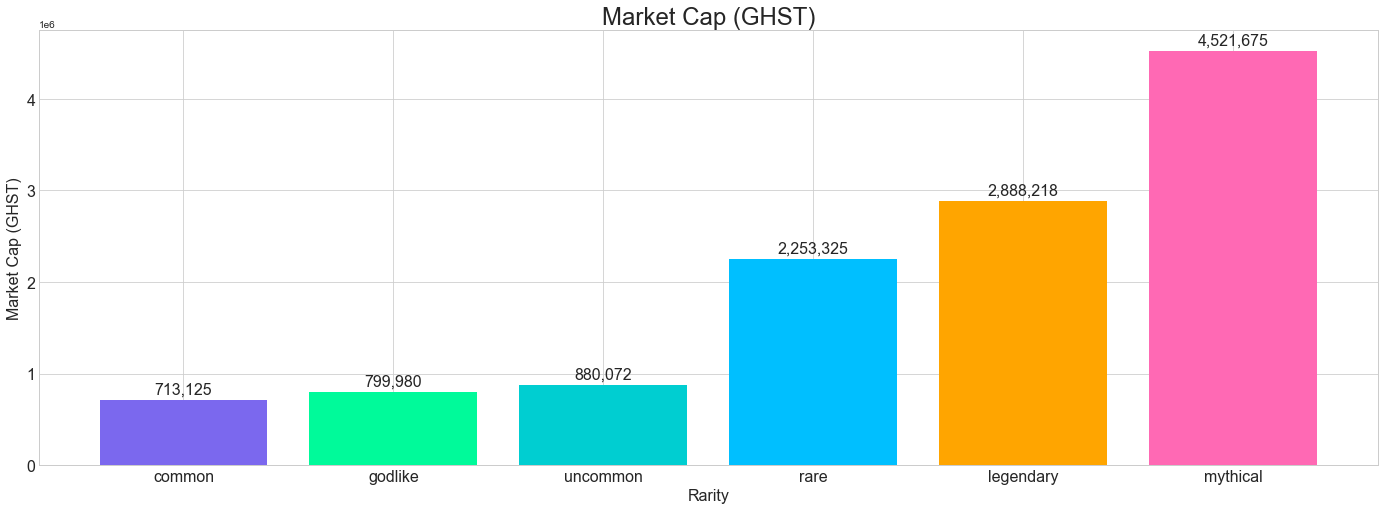

In [6]:
sorted_cap_by_rarity_df = cap_by_rarity_df.sort_values(column_name_mappings['marketCap'])
rarity_colors = list(map(get_rarity_color, sorted_cap_by_rarity_df[column_name_mappings['rarity']].to_list()))
fig, ax = get_bar_charts(sorted_cap_by_rarity_df, column_name_mappings['rarity'], [column_name_mappings['marketCap']], [rarity_colors])

### Proportion of Market Cap by Rarity

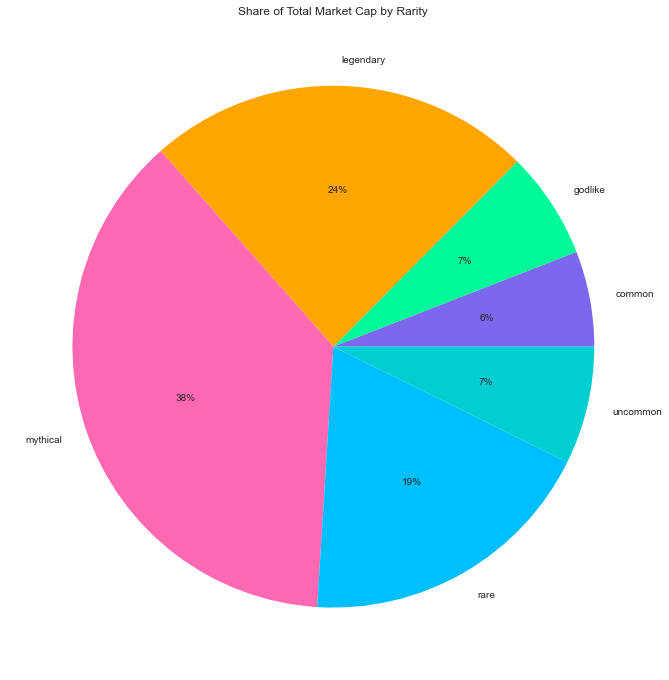

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.set_title('Share of Total Market Cap by Rarity')
ax.pie(cap_by_rarity_df[column_name_mappings['marketCap']], labels=cap_by_rarity_df[column_name_mappings['rarity']], autopct='%.0f%%', colors=list(map(get_rarity_color, cap_by_rarity_df[column_name_mappings['rarity']].tolist()))
)
pass